In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [16]:
# Total number of Dates in Measurament
session.query(func.count(measure.date)).all()

[(19550)]

In [17]:
#First Date
session.query(measure.date).order_by(measure.date).first()

('2010-01-01')

In [18]:
#Last Date
session.query(measure.date).order_by(measure.date.desc()).first()

('2017-08-23')

In [19]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

### Precipitaion Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(measure.date,measure.prcp).\
                        filter(measure.date >= year_ago).\
                        order_by(measure.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
results_df = pd.DataFrame(results,columns= ['Date', 'Precipitation'])
results_df.set_index('Date', inplace=True)
results_df.sort_values("Date", ascending=True)
results_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


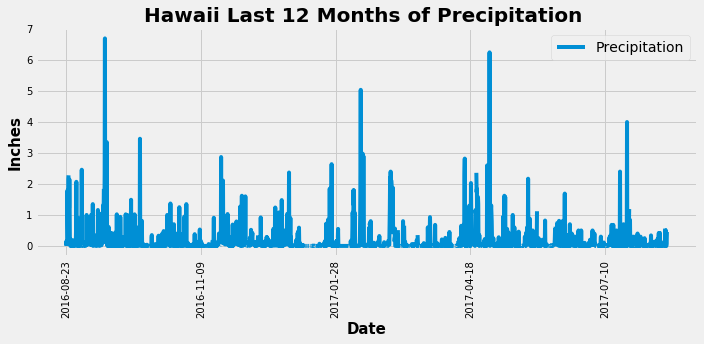

In [22]:
results_df.plot(use_index=True, y='Precipitation', figsize=(10,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Hawaii Last 12 Months of Precipitation ", fontweight='bold',size=20)
plt.xlabel("Date", fontweight='bold', size=15)
plt.ylabel("Inches", fontweight='bold', size=15)
plt.yticks(size=10)
plt.xticks(rotation=90, size=10)
plt.tight_layout()
plt.savefig("../SQLAlchemy_Challenge/prcp.png")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [27]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(measure.station).distinct().count()
station_count

9

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_most = session.query(measure.station, func.count(measure.station))\
    .group_by(measure.station).order_by(func.count(measure.station).desc()).all()
station_most

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_temp = session.query(station.id,
                station.name,
                func.min(measure.tobs),
                func.max(measure.tobs),
                func.avg(measure.tobs)).filter(measure.station == station.station)\
.filter(measure.station == "USC00519281")

print(f"{station_temp[0][1]} is the most active station.")
print(f"{station_temp[0][2]} was the lowest temperature recorded.")
print(f"{station_temp[0][3]} was the highest temperature recorded.")
print(f"{station_temp[0][4]} was the average temperature recorded.")

WAIHEE 837.5, HI US is the most active station.
54.0 was the lowest temperature recorded.
85.0 was the highest temperature recorded.
71.66378066378067 was the average temperature recorded.


In [26]:
waikiki = session.query(measure.date, func.avg(measure.tobs)).\
filter(measure.station == station.station).\
filter(measure.station == "USC00519397").\
group_by(func.strftime('%Y-%m', measure.date)).\
order_by(measure.date.desc()).limit(12).all()

waikiki

[('2017-08-01', 79.57142857142857),
 ('2017-07-01', 79.96666666666667),
 ('2017-06-01', 79.2),
 ('2017-05-01', 77.55172413793103),
 ('2017-04-01', 75.46666666666667),
 ('2017-03-01', 72.35483870967742),
 ('2017-02-01', 69.53571428571429),
 ('2017-01-01', 67.2258064516129),
 ('2016-12-01', 70.54838709677419),
 ('2016-11-01', 74.43333333333334),
 ('2016-10-01', 78.38709677419355),
 ('2016-09-01', 78.56666666666666)]

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_highest = session.query(station.id, station.name, measure.station, func.max(measure.tobs)).\
    group_by(measure.station).order_by(func.max(measure.tobs).desc()).first()
print(f"{station_highest} is the Station with the highest number of temperature observations.")

(1, 'WAIKIKI 717.2, HI US', 'USC00519397', 87.0) is the Station with the highest number of temperature observations.


In [28]:
waikiki = session.query(measure.date,measure.tobs).\
                        filter(measure.date >= year_ago).\
                        order_by(measure.date).all()
waikiki

[('2016-08-23', 81.0),
 ('2016-08-23', 76.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 77.0),
 ('2016-08-23', 74.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 79.0),
 ('2016-08-26', 78.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 84.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 77.0),
 ('2016-08-27', 73.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 75.0),
 ('2016-08-27', 74.0),
 ('2016-08-28', 78.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 71.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 80.0),
 ('2016-08-

In [29]:
waikiki_df = pd.DataFrame(waikiki,columns= ['Date', 'Temperature'])
waikiki_df.set_index('Date', inplace=True)
waikiki_df

,Temperature
Date,
2016-08-23,81.0
2016-08-23,76.0
2016-08-23,80.0
2016-08-23,80.0
2016-08-23,80.0
...,...
2017-08-22,76.0
2017-08-23,81.0
2017-08-23,82.0


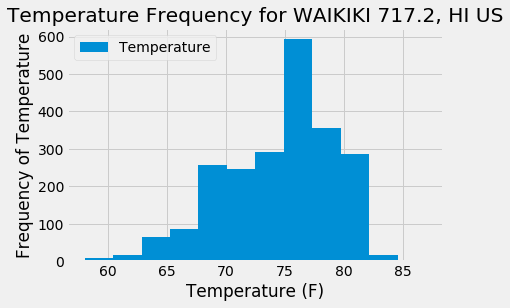

In [30]:
waikiki_df.plot.hist(by="Temperature",bins=12,label="tobs",title=f'Temperature Frequency for {station_highest[1]}')
plt.ylim=(0,80)
plt.ylabel("Frequency of Temperature")
plt.xlabel("Temperature (F)")
plt.legend=()
plt.savefig("../SQLAlchemy_Challenge/station_highest_temp.png")
plt.show()

## Bonus Challenge Assignment

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measure.tobs), func.avg(measure.tobs), func.max(measure.tobs)).\
        filter(measure.date >= start_date).filter(measure.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(measure.tobs), func.avg(measure.tobs), func.max(measure.tobs)).\
        filter(measure.date >= start_date).filter(measure.date <= end_date).all()

print(calc_temps('2014-05-12', '2014-05-30'))

trip = calc_temps('2014-05-12', '2014-05-30')
trip

[(65.0, 73.87142857142857, 81.0)]


[(65.0, 73.87142857142857, 81.0)]

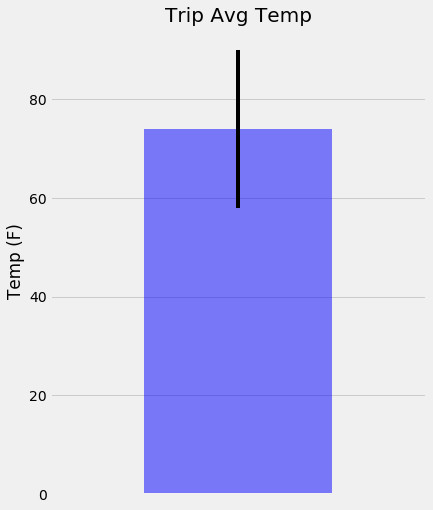

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(trip, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='blue')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid(1)
plt.savefig("../SQLAlchemy_Challenge/trip_avg_temp.png")
plt.show()

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_prcp = session.query(station.station, station.name, measure.date, measure.prcp, station.latitude, station.longitude, station.elevation).\
                            filter(measure.station == station.station).\
                            filter(measure.date >= '2014-05-12').\
                            filter(measure.date <= '2014-05-30').\
                            group_by(station.station).\
                            order_by(measure.prcp.desc()).all()
station_prcp

st_prcp_df = pd.DataFrame(station_prcp,columns= ['Station', 'Name', 'Date', 'Precipitation', 'Latitude', 'Longitude', 'Elevation'])
st_prcp_df.dropna()
st_prcp_df

,Station,Name,Date,Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",2014-05-12,2.79,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",2014-05-12,1.02,21.45167,-157.84889,32.9
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2014-05-12,0.55,21.33556,-157.71139,19.5
3,USC00513117,"KANEOHE 838.1, HI US",2014-05-12,0.48,21.42340,-157.80150,14.6
4,USC00519397,"WAIKIKI 717.2, HI US",2014-05-12,0.45,21.27160,-157.81680,3.0
5,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",2014-05-12,0.03,21.31520,-157.99920,0.9
6,USC00517948,"PEARL CITY, HI US",2014-05-12,NaN,21.39340,-157.97510,11.9
7,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2014-05-12,NaN,21.52130,-157.83740,7.0


In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measure.tobs), func.avg(measure.tobs), func.max(measure.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measure.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [36]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


sel = [measure.date,
      func.min(measure.tobs),
      func.avg(measure.tobs),
      func.max(measure.tobs)]

normals = session.query(*sel).filter(measure.date >= '2014-05-12').\
                            filter(measure.date <= '2014-05-30').\
                            group_by(measure.date).\
                            order_by(measure.date).all()
normals
normals_df = pd.DataFrame(normals,columns= ['Date', 'Min_Temp', 'Avg_Temp', 'Max_Temp'])
normals_df.set_index('Date', inplace=True)
normals_df

,Min_Temp,Avg_Temp,Max_Temp
Date,,,
2014-05-12,69.0,72.000000,74.0
2014-05-13,68.0,71.375000,75.0
2014-05-14,65.0,70.875000,76.0
2014-05-15,65.0,74.125000,79.0
2014-05-16,69.0,74.250000,80.0
2014-05-17,69.0,76.142857,79.0
2014-05-18,72.0,74.800000,79.0
2014-05-19,65.0,72.000000,79.0
2014-05-20,68.0,73.250000,78.0


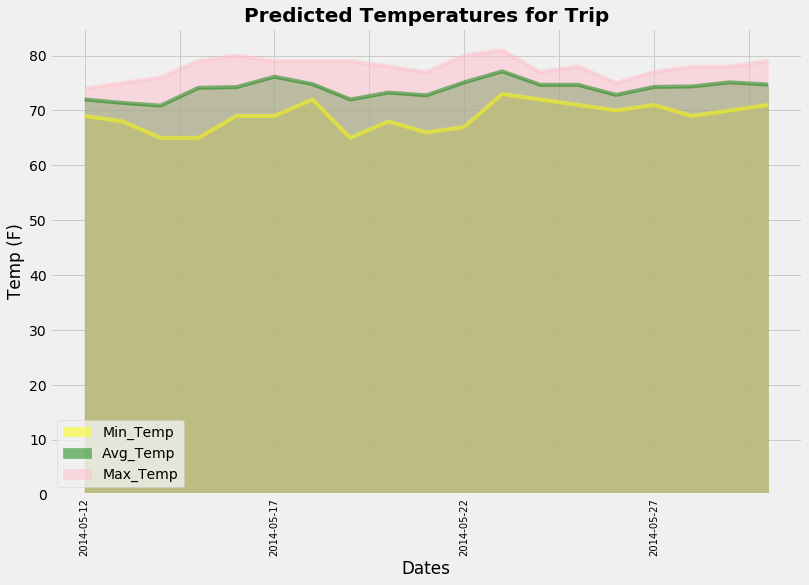

In [37]:
# Plot the daily normals as an area plot with `stacked=False`

colors = ['yellow', 'green', 'pink']
normals_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, color=colors)
plt.title("Predicted Temperatures for Trip", fontweight='bold', size=20)
plt.xlabel('Dates')
plt.ylabel('Temp (F)')
plt.xticks(rotation=90, size=10)
plt.savefig("../SQLAlchemy_predicted_temp.png")
plt.show()